# </font> <font color = #4854E8> DECISION TREE </font>

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

<b>Data Information: </b>
    
   <b>New York City - East River Bicycle Crossings:</b> The New York City Department of Transportation collects daily data about the number of bicycles going over bridges in New York City. This data is used to measure bike utilization as a part of transportation planning. This dataset is a daily record of the number of bicycles crossing into or out of Manhattan via one of the East River bridges (that is, excluding Bronx thruways and the non-bikeable Hudson River tunnels) for a stretch of 9 months. <br>

   <b> Content </b> <br>
A count of the number of bicycles on each of the bridges in question is provided on a day-by-day basis, along with information on maximum and minimum temperature and precipitation.

   <b> Link: </b> <br>
https://data.cityofnewyork.us/Transportation/Bicycle-Counts-for-East-River-Bridges-Historical-/gua4-p9wg

<b> Importing the Libaries and dataset </b>

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('nyc-east-river-bicycle-counts.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,4/1/2016 0:00,4/1/2016 0:00,78.1,66.0,0.01,1704,3126,4115,2552,11497
1,1,4/2/2016 0:00,4/2/2016 0:00,55.0,48.9,0.15,827,1646,2565,1884,6922
2,2,4/3/2016 0:00,4/3/2016 0:00,39.9,34.0,0.09,526,1232,1695,1306,4759
3,3,4/4/2016 0:00,4/4/2016 0:00,44.1,33.1,0.47,521,1067,1440,1307,4335
4,4,4/5/2016 0:00,4/5/2016 0:00,42.1,26.1,0.00,1416,2617,3081,2357,9471


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           210 non-null    int64  
 1   Date                 210 non-null    object 
 2   Day                  210 non-null    object 
 3   High Temp (°F)       210 non-null    float64
 4   Low Temp (°F)        210 non-null    float64
 5   Precipitation        210 non-null    float64
 6   Brooklyn Bridge      210 non-null    int64  
 7   Manhattan Bridge     210 non-null    int64  
 8   Williamsburg Bridge  210 non-null    int64  
 9   Queensboro Bridge    210 non-null    int64  
 10  Total                210 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 18.2+ KB


In [5]:
df.describe()

,Unnamed: 0,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,104.500000,60.580000,46.413333,0.052333,2269.633333,4049.533333,4862.466667,3352.866667,14534.500000
std,60.765944,11.183223,9.522796,0.102148,981.237786,1704.731356,1814.039499,1099.254419,5569.173496
min,0.000000,39.900000,26.100000,0.000000,504.000000,997.000000,1440.000000,1306.000000,4335.000000
25%,52.250000,55.000000,44.100000,0.000000,1447.000000,2617.000000,3282.000000,2457.000000,9596.000000
50%,104.500000,62.100000,46.900000,0.000000,2379.500000,4165.000000,5194.000000,3477.000000,15292.500000
75%,156.750000,68.000000,50.000000,0.090000,3147.000000,5309.000000,6030.000000,4192.000000,18315.000000
max,209.000000,81.000000,66.000000,0.470000,3871.000000,6951.000000,7834.000000,5032.000000,23318.000000


In [6]:
print(f'The number of rows    :{df.shape[0]}')
print(f'The number of columns :{df.shape[1]}')

The number of rows    :210
The number of columns :11


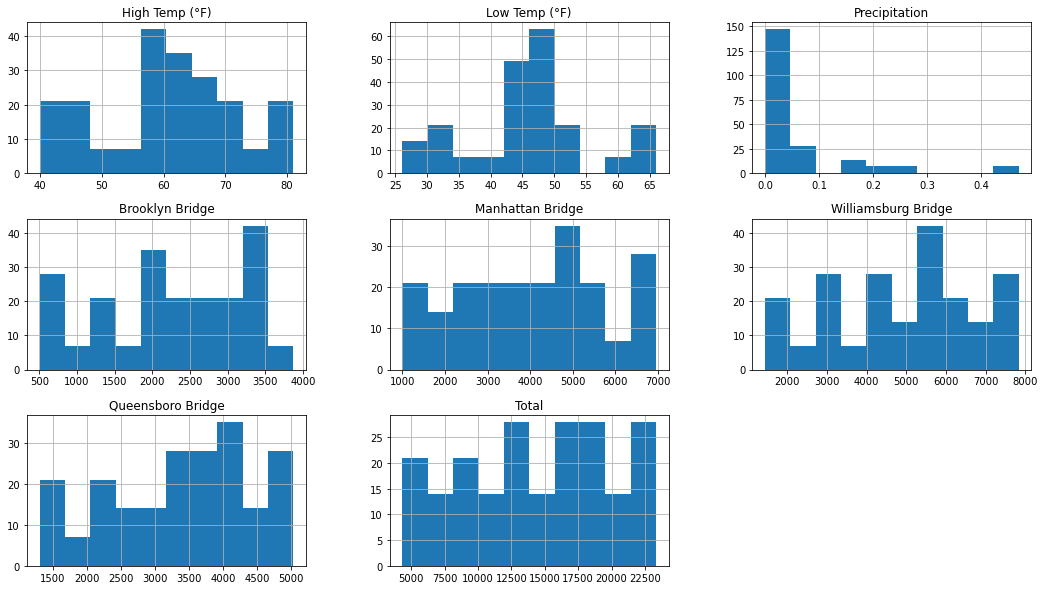

In [7]:
df.iloc[:,3:11].hist(figsize=(18,10))
plt.show()

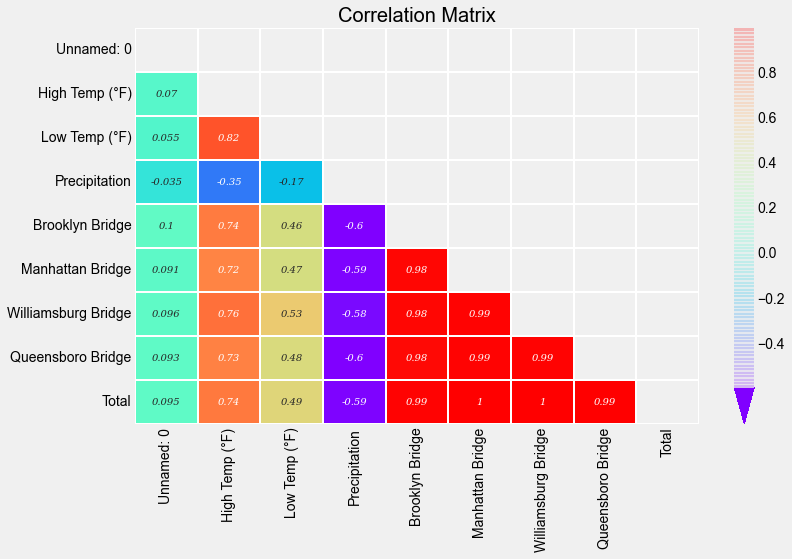

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,8))

annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

matrix = np.triu(df.corr())

ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)
plt.title('Correlation Matrix', fontsize = 20)
sns.set(font_scale = 1.2)

plt.tight_layout()

<b> Data Preprocessing </b>

In [9]:
df.isna().sum()

Unnamed: 0             0
Date                   0
Day                    0
High Temp (°F)         0
Low Temp (°F)          0
Precipitation          0
Brooklyn Bridge        0
Manhattan Bridge       0
Williamsburg Bridge    0
Queensboro Bridge      0
Total                  0
dtype: int64

Removing the unwanted columns

In [10]:
df = df.drop(['Unnamed: 0', 'Day', 'Date'],axis=1)
df.head()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,78.1,66.0,0.01,1704,3126,4115,2552,11497
1,55.0,48.9,0.15,827,1646,2565,1884,6922
2,39.9,34.0,0.09,526,1232,1695,1306,4759
3,44.1,33.1,0.47,521,1067,1440,1307,4335
4,42.1,26.1,0.00,1416,2617,3081,2357,9471


In [11]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [12]:
X.head()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge
0,78.1,66.0,0.01,1704,3126,4115,2552
1,55.0,48.9,0.15,827,1646,2565,1884
2,39.9,34.0,0.09,526,1232,1695,1306
3,44.1,33.1,0.47,521,1067,1440,1307
4,42.1,26.1,0.00,1416,2617,3081,2357


In [13]:
Y.head()

0    11497
1     6922
2     4759
3     4335
4     9471
Name: Total, dtype: int64

<b> Spliting the data into train and test </b>

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [15]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (168, 7)
y_train (168,)
X_test (42, 7)
y_test (42,)


In [16]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6
0,-0.377462,-0.723811,-0.495393,0.532369,0.742444,0.584688,0.729635
1,0.885437,0.342858,-0.495393,1.134141,1.356073,1.370364,1.290559
2,-1.532881,-1.441964,4.058304,-1.809092,-1.770129,-1.916188,-1.876269
3,-1.452270,-1.769357,-0.495393,-0.431881,-0.456950,-0.589708,-0.483443
4,-1.631405,-0.935032,0.376591,-1.826257,-1.810767,-1.879402,-1.700134


<b> Building Decision Tree Regression </b>

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
regressor = DecisionTreeRegressor(max_depth=3, random_state=0)

In [19]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [20]:
y_pred = regressor.predict(X_test)

In [21]:
y_pred

array([17976.16216216, 22791.33333333,  4522.1875    , 12655.36666667,
        4522.1875    , 15850.27272727, 20509.63636364,  4522.1875    ,
       12655.36666667,  9351.3125    , 15850.27272727,  9351.3125    ,
       12655.36666667, 12655.36666667,  9351.3125    , 20509.63636364,
       17976.16216216, 12655.36666667,  9351.3125    , 22791.33333333,
       22791.33333333, 15850.27272727, 12655.36666667, 12655.36666667,
        4522.1875    , 17976.16216216, 12655.36666667,  9351.3125    ,
        4522.1875    , 12655.36666667, 15850.27272727, 17976.16216216,
       22791.33333333,  7399.08333333, 12655.36666667, 12655.36666667,
       20509.63636364, 15850.27272727, 17976.16216216, 15850.27272727,
        7399.08333333, 12655.36666667])

<b> Evaluate the Result </b>

In this part, we evaluate the Linear Regression Model. And for evaluation we will use three metrics. <br>

`R Square`: R Square measures how much variability in dependent variable can be explained by the model. <br>

`Mean Square Error`: MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number. <br>

`Mean Absolute Error`: Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.

In [22]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [23]:
r2 = r2_score(y_pred,y_test)
print(f'r square error : {r2}')
mean_abs = mean_absolute_error(y_pred,y_test)
print(f'mean absolute error : {mean_abs}')
mean_squ = mean_squared_error(y_pred,y_test)
print(f'mean squared error : {mean_squ}')

r square error : 0.9898349974695154
mean absolute error : 466.30885739635744
mean squared error : 289712.06677076913


<b> Visulaizing the predicted result </b>

In [24]:
from sklearn import tree
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_4 <= -0.08
|   |--- feature_3 <= -1.16
|   |   |--- feature_3 <= -1.65
|   |   |   |--- value: [4522.19]
|   |   |--- feature_3 >  -1.65
|   |   |   |--- value: [7399.08]
|   |--- feature_3 >  -1.16
|   |   |--- feature_3 <= -0.74
|   |   |   |--- value: [9351.31]
|   |   |--- feature_3 >  -0.74
|   |   |   |--- value: [12655.37]
|--- feature_4 >  -0.08
|   |--- feature_6 <= 0.82
|   |   |--- feature_4 <= 0.38
|   |   |   |--- value: [15850.27]
|   |   |--- feature_4 >  0.38
|   |   |   |--- value: [17976.16]
|   |--- feature_6 >  0.82
|   |   |--- feature_6 <= 1.18
|   |   |   |--- value: [20509.64]
|   |   |--- feature_6 >  1.18
|   |   |   |--- value: [22791.33]



<b> Making a Single Prediction </b>

<font color = blue>How many  bicycles going over bridges if ..?

In [25]:
col = ['High Temp (°F)', 'Low Temp (°F)', 'Precipitation', 'Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge', 'Total']

pd.DataFrame([[67.2, 44.2, 0.22, 600, 1212, 4030, 2011, '?']], columns = col)

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,67.2,44.2,0.22,600,1212,4030,2011,?


In [26]:
regressor.predict(SS.transform(np.array([[67.2, 44.2, 0.22, 600, 1212, 4030, 2011]])))

array([4522.1875])